In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salaries.csv')

In [3]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [4]:
## Here we have the features -> company, job and degree
## Our targetClass is salary_more_than_100k

In [8]:
## Since all the features are nominal categorical columns so we will do encoding here

In [9]:
X = df[['company', 'job', 'degree']]
y = df['salary_more_then_100k']

In [11]:
X = pd.get_dummies(X, drop_first = True, dtype = int)
X.head()

,company_facebook,company_google,job_computer programmer,job_sales executive,degree_masters
0,0,1,0,1,0
1,0,1,0,1,1
2,0,1,0,0,0
3,0,1,0,0,1
4,0,1,1,0,0


In [12]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In [13]:
## Next we will split the data into training and test splits

In [14]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
## Generating the required model

In [31]:
from sklearn import tree

In [32]:
model = tree.DecisionTreeClassifier()

In [33]:
## Fitting the model with our training dataset

In [34]:
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [35]:
## Model predicting

In [36]:
y_pred = model.predict(X_test)

In [37]:
## Checking the model score for the training dataset

In [38]:
model.score(X_train, y_train)

1.0

In [39]:
## Checking the model score for the test dataset

In [40]:
model.score(X_test, y_test)

0.25

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
cm = confusion_matrix(y_test, y_pred)

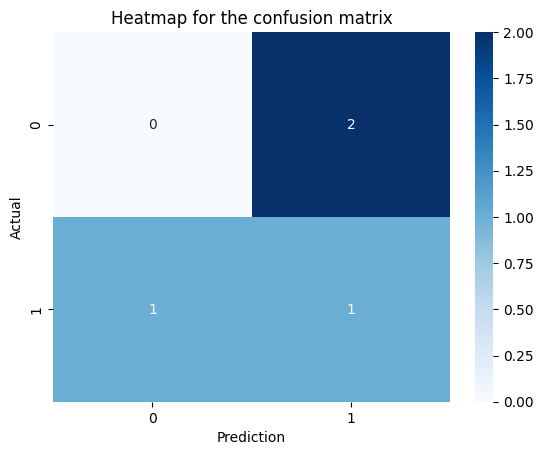

In [46]:
fig, ax = plt.subplots()
ax.set_title('Heatmap for the confusion matrix')
sns.heatmap(cm, annot = True, cmap = 'Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4

